# Sesi 6

EDA with Pandas

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')

In [3]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [4]:
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [5]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [6]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [7]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [8]:
missing_values = ['n/a', 'na', '--', 'kosong', 'tidak diinput']

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv',
                na_values=missing_values)

In [10]:
df['NUM_BEDROOMS']

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [11]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [14]:
cnt=0

for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED'] = np.nan
    except ValueError:
        pass
    cnt+=1

In [15]:
df['OWN_OCCUPIED']

0        Y
1        N
2        N
3      NaN
4        Y
5        Y
6      NaN
7        Y
8        Y
cnt    NaN
Name: OWN_OCCUPIED, dtype: object

In [17]:
df.isnull().sum()

PID             2
ST_NUM          3
ST_NAME         1
OWN_OCCUPIED    3
NUM_BEDROOMS    5
NUM_BATH        2
SQ_FT           3
dtype: int64

In [19]:
df.isnull().values.any()

True

In [20]:
df.isnull().sum().sum()

19

In [21]:
df['ST_NUM'].fillna(21, inplace=True)

In [24]:
df.head()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,21.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,310.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0


In [23]:
df.loc[3, 'ST_NUM'] = 310

In [25]:
median = df['NUM_BEDROOMS'].median()

df['NUM_BEDROOMS'].fillna(median, inplace=True)

In [26]:
df.head()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,21.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,310.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0


## Time Series

In [27]:
from datetime import datetime

In [28]:
date_rng = pd.date_range(start='1/01/2021',
              end='1/08/2021',
              freq='H')

In [29]:
date_rng

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2021-01-07 15:00:00', '2021-01-07 16:00:00',
               '2021-01-07 17:00:00', '2021-01-07 18:00:00',
               '2021-01-07 19:00:00', '2021-01-07 20:00:00',
               '2021-01-07 21:00:00', '2021-01-07 22:00:00',
               '2021-01-07 23:00:00', '2021-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [30]:
df = pd.DataFrame(date_rng, columns=['date'])

In [31]:
df['data'] = np.random.randint(0,
                               100,
                               size=(len(date_rng)))

In [32]:
df.head()

,date,data
0,2021-01-01 00:00:00,99
1,2021-01-01 01:00:00,66
2,2021-01-01 02:00:00,67
3,2021-01-01 03:00:00,91
4,2021-01-01 04:00:00,11


In [34]:
df.set_index('date', inplace=True)

In [35]:
df.head()

,data
date,
2021-01-01 00:00:00,99
2021-01-01 01:00:00,66
2021-01-01 02:00:00,67
2021-01-01 03:00:00,91
2021-01-01 04:00:00,11


In [36]:
string_date = ['June-01-2020', 'June-02-2020', 'June-03-2020']

In [37]:
string_date

['June-01-2020', 'June-02-2020', 'June-03-2020']

In [38]:
[datetime.strptime(x, '%B-%d-%Y') for x in string_date]

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

In [39]:
df.head()

,data
date,
2021-01-01 00:00:00,99
2021-01-01 01:00:00,66
2021-01-01 02:00:00,67
2021-01-01 03:00:00,91
2021-01-01 04:00:00,11


In [40]:
df[df.index.day == 2]

,data
date,
2021-01-02 00:00:00,55
2021-01-02 01:00:00,88
2021-01-02 02:00:00,47
2021-01-02 03:00:00,2
2021-01-02 04:00:00,55
2021-01-02 05:00:00,75
2021-01-02 06:00:00,86
2021-01-02 07:00:00,79
2021-01-02 08:00:00,6


In [41]:
df['2021-01-03']

,data
date,
2021-01-03 00:00:00,52
2021-01-03 01:00:00,29
2021-01-03 02:00:00,30
2021-01-03 03:00:00,89
2021-01-03 04:00:00,26
2021-01-03 05:00:00,12
2021-01-03 06:00:00,91
2021-01-03 07:00:00,20
2021-01-03 08:00:00,88


In [42]:
df['2021-01-04':'2021-01-06']

,data
date,
2021-01-04 00:00:00,90
2021-01-04 01:00:00,58
2021-01-04 02:00:00,14
2021-01-04 03:00:00,27
2021-01-04 04:00:00,7
...,...
2021-01-06 19:00:00,61
2021-01-06 20:00:00,96
2021-01-06 21:00:00,53


In [43]:
df.resample('D').mean()

,data
date,
2021-01-01,53.458333
2021-01-02,44.166667
2021-01-03,47.000000
2021-01-04,45.166667
2021-01-05,47.416667
2021-01-06,62.375000
2021-01-07,53.958333
2021-01-08,19.000000


In [44]:
df.rolling(3).sum()

,data
date,
2021-01-01 00:00:00,NaN
2021-01-01 01:00:00,NaN
2021-01-01 02:00:00,232.0
2021-01-01 03:00:00,224.0
2021-01-01 04:00:00,169.0
...,...
2021-01-07 20:00:00,220.0
2021-01-07 21:00:00,149.0
2021-01-07 22:00:00,148.0


In [45]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv')

In [46]:
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [47]:
opsd_daily.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [48]:
opsd_daily.set_index('Date', inplace=True)
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [49]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv',
                        index_col=0,
                        parse_dates=True)

opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [50]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday

In [51]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3


In [53]:
opsd_daily.loc['2006-01-01']

Consumption    1069.184
Wind                NaN
Solar               NaN
Wind+Solar          NaN
Year           2006.000
Month             1.000
Weekday           6.000
Name: 2006-01-01 00:00:00, dtype: float64

In [54]:
opsd_daily.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,2
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,3
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,4
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,5
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,6
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,0
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,1
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,2
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,3


<AxesSubplot:xlabel='Date'>

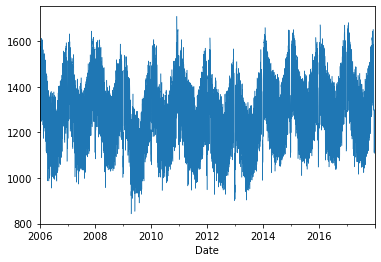

In [56]:
opsd_daily['Consumption'].plot(linewidth=0.5)

<AxesSubplot:xlabel='Date'>

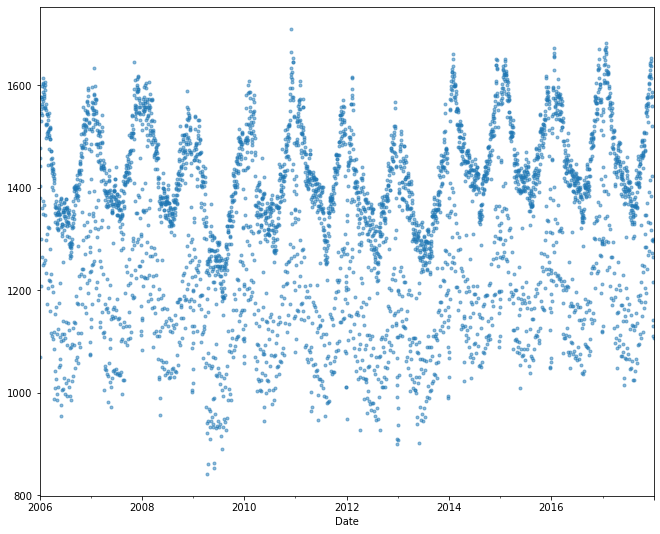

In [60]:
opsd_daily['Consumption'].plot(marker='.',
                              alpha=0.5,
                              linestyle='None',
                              figsize=(11, 9))

<AxesSubplot:xlabel='Date'>

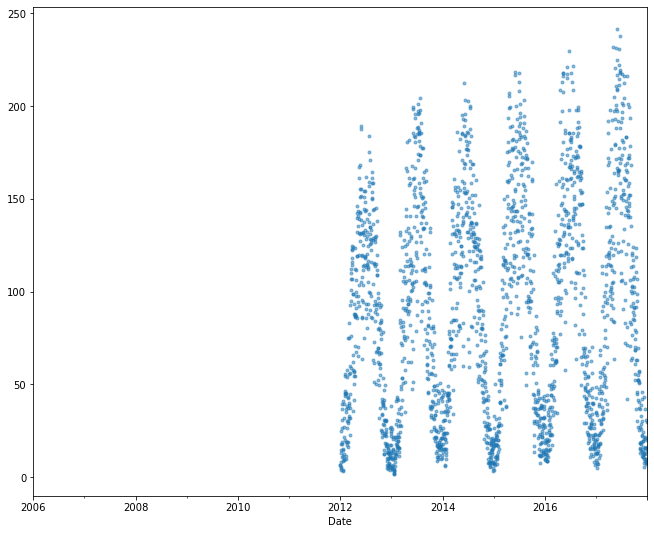

In [61]:
opsd_daily['Solar'].plot(marker='.',
                              alpha=0.5,
                              linestyle='None',
                              figsize=(11, 9))

<AxesSubplot:xlabel='Date'>

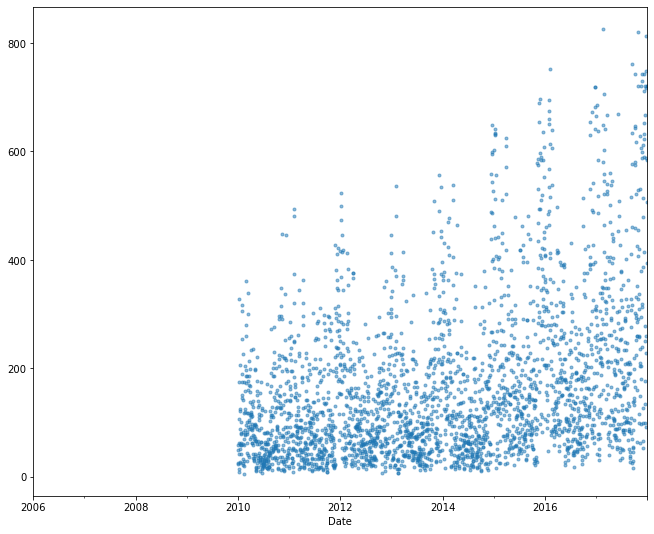

In [63]:
opsd_daily['Wind'].plot(marker='.',
                              alpha=0.5,
                              linestyle='None',
                              figsize=(11, 9))

<AxesSubplot:xlabel='Date'>

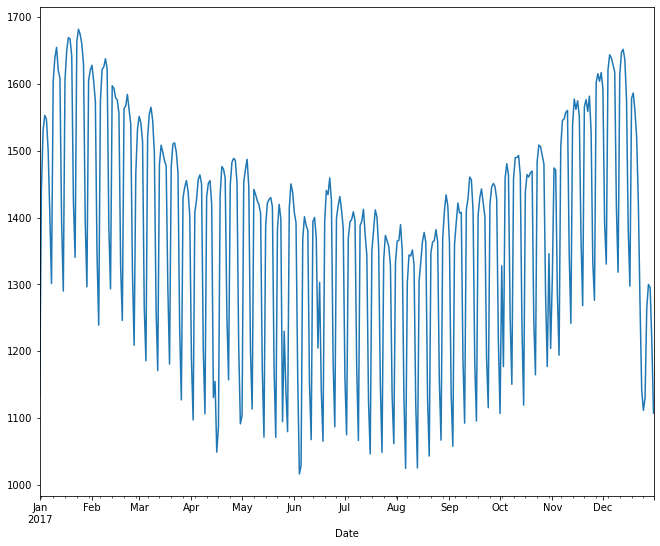

In [64]:
opsd_daily.loc['2017', 'Consumption'].plot(figsize=(11, 9))

<AxesSubplot:xlabel='Date'>

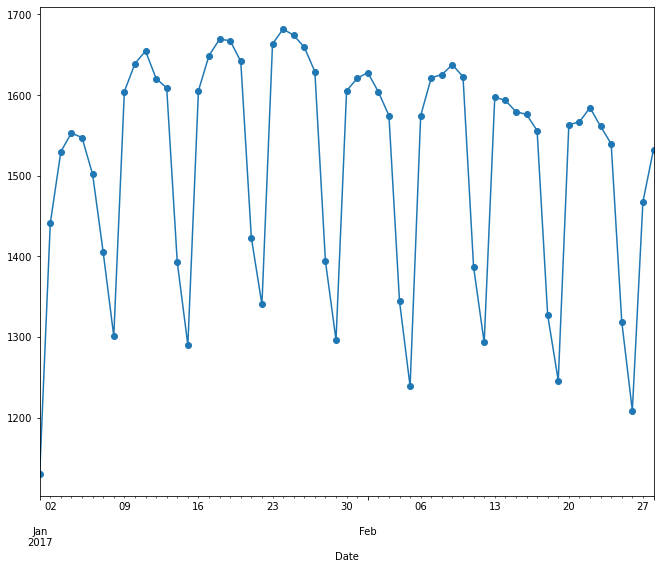

In [65]:
opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', figsize=(11, 9))